In [ ]:
import datetime as dt
from pandas import Series, DataFrame
from pandas_datareader import DataReader # For reading stock data from yahoo
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
def get_stock_info(stock,  start, source='NS', end=dt.datetime.now()):
  #For-loop for grabing yahoo finance data and setting as a dataframe
  # Set DataFrame as the Stock Ticker
  suffix= '.'+ source
  stock= stock + suffix
  return DataReader(stock,'yahoo',start,end)
stock= 'SBIN'
start = dt.datetime(2013,1,1)
end = dt.datetime(2019,12,31)
stk_data= get_stock_info(stock,start,'BO',end)


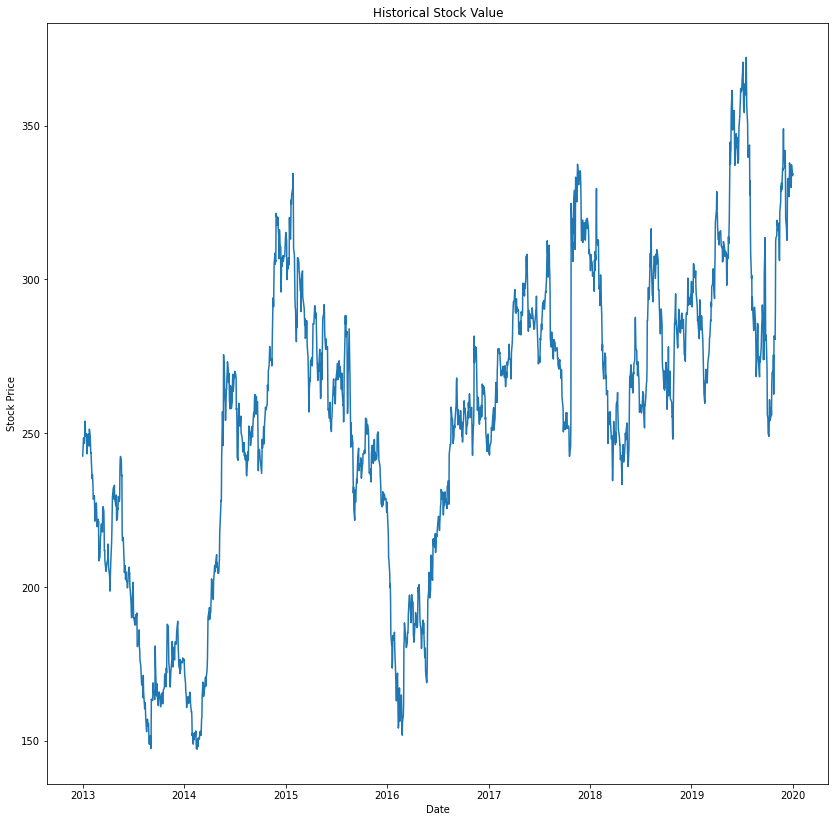

In [ ]:
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [ ]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [ ]:
#defining train set

In [ ]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#add LSTM layers
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
#train model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
45/45 [==============================] - 12s 111ms/step - loss: 0.0638
Epoch 2/15
45/45 [==============================] - 5s 113ms/step - loss: 0.0074
Epoch 3/15
45/45 [==============================] - 5s 115ms/step - loss: 0.0071
Epoch 4/15
45/45 [==============================] - 5s 114ms/step - loss: 0.0065
Epoch 5/15
45/45 [==============================] - 5s 114ms/step - loss: 0.0061
Epoch 6/15
45/45 [==============================] - 5s 114ms/step - loss: 0.0049
Epoch 7/15
45/45 [==============================] - 5s 114ms/step - loss: 0.0051
Epoch 8/15
45/45 [==============================] - 5s 113ms/step - loss: 0.0048
Epoch 9/15
45/45 [==============================] - 5s 114ms/step - loss: 0.0052
Epoch 10/15
45/45 [==============================] - 5s 113ms/step - loss: 0.0043
Epoch 11/15
45/45 [==============================] - 5s 114ms/step - loss: 0.0049
Epoch 12/15
45/45 [==============================] - 5s 117ms/step - loss: 0.0045
Epoch 13/15
45/45 [=====

Get test data

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [ ]:
testdataframe= get_stock_info(stock,dt.datetime(2020,1,1),'BO',dt.datetime.now())
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)+1):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


Test it for real

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualise predictions

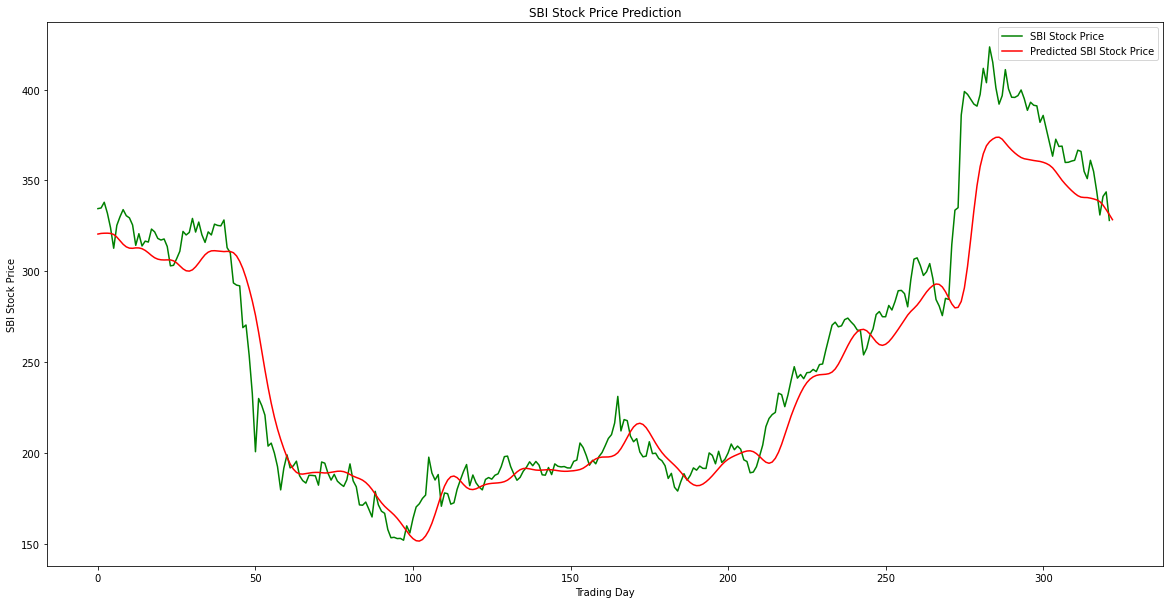

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

In [ ]:
print("Prediction for day of viva:")
if(predicted_stock_price[-1]>predicted_stock_price[-2]):
  print("Up")
else:
  print("Down")
predicted_stock_price[-1]

Prediction for day of viva:
Down


array([328.41388], dtype=float32)

Check Model

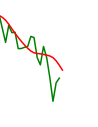

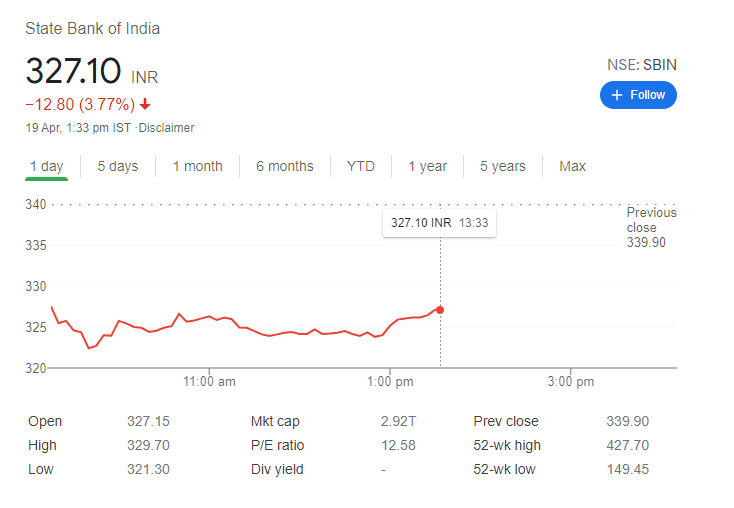